<a href="https://colab.research.google.com/github/sahupra1357/FeatureEngineering/blob/main/ImageAgumentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -U -q kaggle==1.5.8

     |████████████████████████████████| 59 kB 2.1 MB/s 


In [2]:
!mkdir -p ~/.kaggle

In [3]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"pradeepsahu1357","key":"b78a1773d2ce934ad103512a70ef714f"}'}

In [4]:
!cp kaggle.json ~/.kaggle/

In [5]:
!chmod 600 ~/.kaggle/kaggle.json

In [6]:
!kaggle competitions download -c dogs-vs-cats

 99% 803M/812M [00:32<00:00, 16.9MB/s]
100% 812M/812M [00:32<00:00, 26.3MB/s]


In [7]:
!ls

dogs-vs-cats.zip  kaggle.json  sample_data


In [8]:
!unzip dogs-vs-cats.zip -d dogs-vs-cats

Archive:  dogs-vs-cats.zip
  inflating: dogs-vs-cats/sampleSubmission.csv  
  inflating: dogs-vs-cats/test1.zip  
  inflating: dogs-vs-cats/train.zip  


In [ ]:
!unzip dogs-vs-cats/test1.zip -d dogs-vs-cats

In [ ]:
!unzip dogs-vs-cats/train.zip -d dogs-vs-cats

In [18]:
!ls dogs-vs-cats/train | wc -l

25000


In [20]:
!ls dogs-vs-cats/train/cat.0.jpg

dogs-vs-cats/train/cat.0.jpg


In [ ]:
!pip install d2l==0.17.0
!pip install -U mxnet-cu101==1.7.0

In [22]:
%matplotlib inline
from mxnet import autograd, gluon, image, init, np, npx
from mxnet.gluon import nn
from d2l import mxnet as d2l

npx.set_np()

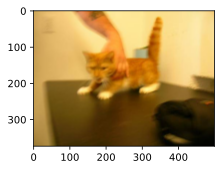

In [23]:
d2l.set_figsize()
img = image.imread('dogs-vs-cats/train/cat.0.jpg')
d2l.plt.imshow(img.asnumpy());

In [24]:
def apply(img, aug, num_rows=2, num_cols=4, scale=1.5):
    Y = [aug(img) for _ in range(num_rows * num_cols)]
    d2l.show_images(Y, num_rows, num_cols, scale=scale)

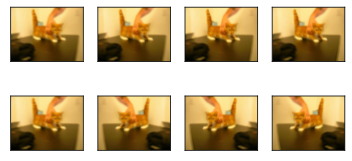

In [25]:
apply(img, gluon.data.vision.transforms.RandomFlipLeftRight())

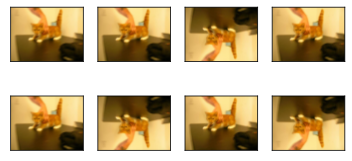

In [26]:
apply(img, gluon.data.vision.transforms.RandomFlipTopBottom())

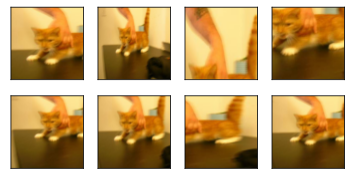

In [27]:
shape_aug = gluon.data.vision.transforms.RandomResizedCrop(
    (200, 200), scale=(0.1, 1), ratio=(0.5, 2))
apply(img, shape_aug)

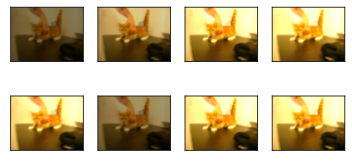

In [28]:
apply(img, gluon.data.vision.transforms.RandomBrightness(0.5))

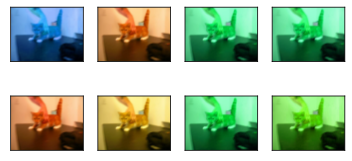

In [29]:
apply(img, gluon.data.vision.transforms.RandomHue(0.5))

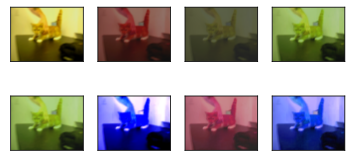

In [30]:
color_aug = gluon.data.vision.transforms.RandomColorJitter(
    brightness=0.5, contrast=0.5, saturation=0.5, hue=0.5)
apply(img, color_aug)

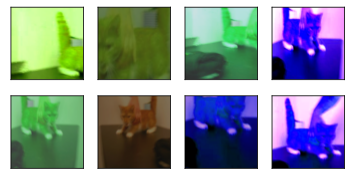

In [31]:
augs = gluon.data.vision.transforms.Compose([
    gluon.data.vision.transforms.RandomFlipLeftRight(), color_aug, shape_aug])
apply(img, augs)

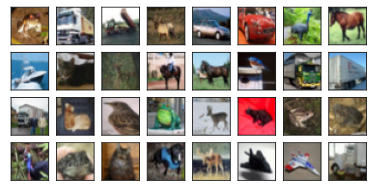

In [32]:
d2l.show_images(
    gluon.data.vision.CIFAR10(train=True)[0:32][0], 4, 8, scale=0.8);

In [33]:
train_augs = gluon.data.vision.transforms.Compose([
    gluon.data.vision.transforms.RandomFlipLeftRight(),
    gluon.data.vision.transforms.ToTensor()])

test_augs = gluon.data.vision.transforms.Compose([
    gluon.data.vision.transforms.ToTensor()])

In [34]:
def load_cifar10(is_train, augs, batch_size):
    return gluon.data.DataLoader(
        gluon.data.vision.CIFAR10(train=is_train).transform_first(augs),
        batch_size=batch_size, shuffle=is_train,
        num_workers=d2l.get_dataloader_workers())